## Py City Schools - Final Data Analysis
#### By: Mike Suomi 6/6/2018

- Observed Trend 1: From the data, it is impossible to determine whether the type of school (Charter vs District), the size of school, or some combination of both factors is most critical for student passing data because of how the data overlaps.  Small and Medium schools have an approximately 95% pass rate, wherease Large schools have an approximately 74% pass rate, which is substantially lower.  However, every single Small and Medium school is a Charter school and every single Large school is a District school.  So, with the dataset we have, it is impossible to tease out which of those variables may have the most important influence on passing rate.


- Observed Trend 2: School spending per student trends appear to indicate an inverse relationship between student spending and passing rate (meaning the more schools spend per student, the lower their test scores).  However, yet again, as indicated from the first observation these results are so tied into Charter/District schools, which also ties in school size.  The two lowest spending categories are all Charter schools (which are also small/medium schools). Do we really think that the if we reduced per student spending on the District schools that we would magically increase test scores? - No, of course not.  However, based on student test results, it may be more equitable to give Charter schools a higher per student budget that matches District school levels since they are getting some of the best test scores for our School System.


- Observed Trend 3: In each school, there is no real trend for %passsing or score by grade level.  In each school they stay relatively consistent for each grade level.  This is actually a positive thing because typically around the country there is a trend of the % passing decreasing as students get in higher grade levels, so the fact it is staying relatively constant actually bucks that bigger trend.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#could change to an input variable for future files to run, but hard code for now
school_file_name = 'schools_complete.csv' #input('What is the name of the school file? (make sure it is saved to raw_data folder)\n')
student_file_name = 'students_complete.csv' #input('What is the name of the student file? (make sure it is saved to raw_data folder)\n')

school_data_path = 'raw_data\\' + school_file_name
student_data_path = 'raw_data\\' + student_file_name

df_school = pd.read_csv(school_data_path)
df_student = pd.read_csv(student_data_path)

In [3]:
df_school.rename(columns={'name':'school'}, inplace=True)

df = pd.merge(df_school, df_student, how='inner', on='school')

### District Summary

In [4]:
total_schools = len(df.school.unique())
total_students = len(df['Student ID'].unique())
total_budget = df_school.budget.sum()
average_math_score = df.math_score.mean()
average_reading_score = df.reading_score.mean()

#create pass/fail column for both math and reading in df
#assuming a 70% is passing
df['math_pass'] = df.math_score.map(lambda x: 'pass' if x >= 70 else 'fail')
df['reading_pass'] = df.reading_score.map(lambda x: 'pass' if x >= 70 else 'fail')

percent_math_pass = df.math_pass.value_counts()['pass'] / total_students * 100
percent_reading_pass = df.reading_pass.value_counts()['pass'] / total_students * 100
percent_pass_average = np.mean([percent_math_pass, percent_reading_pass])

In [5]:
#create dataframe with a tuple of row values and column labels list so df ordered how we want
district_summ_col_labels = ['Total Schools',
                            'Total Students',
                            'Total Budget',
                            'Average Math Score',
                            'Average Reading Score',
                            '% Passing Math',
                            '% Passing Reading',
                            '% Overall Passing Rate']

#the formatting is embedded on entry - this does change them to string values
district_summ_values = [(total_schools,
                       '{:,}'.format(total_students),
                       '${:,}'.format(total_budget),
                       '{:.1f}'.format(average_math_score),
                       '{:.1f}'.format(average_reading_score),
                       '{:.2f}%'.format(percent_math_pass),
                       '{:.2f}%'.format(percent_reading_pass),
                       '{:.2f}%'.format(percent_pass_average))]

df_district_summ = pd.DataFrame(data=district_summ_values,
                                columns=district_summ_col_labels)

df_district_summ

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
0,15,"39,170","$24,649,428",79.0,81.9,74.98%,85.81%,80.39%


### School Summary

In [6]:
#can put groupby methods in quotes to reference them
df_school_summ = df.groupby('school').agg({'type': 'first', #School Type
                         'size': 'first', #Total Students 
                         'budget': 'first', #Total School Budget
                         #'', #Per Student Budget
                         'math_score': 'mean', #Average Math Score
                         'reading_score': 'mean' #Average Reading Score
                         #'', #% Passing Math
                         #'', #%Passing Reading 
                         #'', #Overall Passing Rate (avg of two) 
                         }).rename(columns={'type': 'School Type',
                                    'size': 'Total Students',
                                    'budget': 'Total School Budget',
                                    'math_score': 'Average Math Score',
                                    'reading_score': 'Average Reading Score'})

#df.insert(loc=idx, column='A', value=new_col)
df_school_summ.insert(loc=3, column='Per Student Budget', 
                      value= df_school_summ['Total School Budget'] / df_school_summ['Total Students'])

In [7]:
#for math and reading pass rate, first groupby school, then just get the column for pass/fail
#then use value_counts and set normalize = True so that gets percent value
#make sure to set sort=False for value_counts so always arranges alphabetically fail then pass for each school grouping
#the output is fail and pass score for each school, we only want pass rate so from this series
#select only every other value (starting on the 1st index) to then insert into the df_school_summ columns
#multiply by 100 to get it to common percentage viewing form
math_pass_grp = df.groupby('school')['math_pass']
math_pass_school = math_pass_grp.value_counts(sort=False, normalize=True)[1::2] * 100
#print(math_pass_school) #temporary check
df_school_summ['% Passing Math'] = list(math_pass_school)

reading_pass_grp = df.groupby('school')['reading_pass']
reading_pass_school = reading_pass_grp.value_counts(sort=False, normalize=True)[1::2] * 100
#print(reading_pass_school) #temporary check
df_school_summ['% Passing Reading'] = list(reading_pass_school)

df_school_summ['% Overall Passing Rate'] = df_school_summ[['% Passing Math', '% Passing Reading']].mean(axis=1)

In [8]:
##dataframe formatting for output

##temporarily format the style of the whole data table, so can use the numbers later
df_school_summ.style.format({'Total Students': '{:,}'.format,
                              'Total School Budget': '${:,}'.format,
                              'Per Student Budget': '${:.2f}'.format,
                              'Average Math Score': '{:.1f}'.format,
                              'Average Reading Score': '{:.1f}'.format,
                              '% Passing Math': '{:.2f}%'.format,
                              '% Passing Reading': '{:.2f}%'.format,
                              '% Overall Passing Rate': '{:.2f}%'.format,})

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school,,,,,,,,,
Bailey High School,District,"4,976","$3,124,928",$628.00,77.0,81.0,66.68%,81.93%,74.31%
Cabrera High School,Charter,"1,858","$1,081,356",$582.00,83.1,84.0,94.13%,97.04%,95.59%
Figueroa High School,District,"2,949","$1,884,411",$639.00,76.7,81.2,65.99%,80.74%,73.36%
Ford High School,District,"2,739","$1,763,916",$644.00,77.1,80.7,68.31%,79.30%,73.80%
Griffin High School,Charter,"1,468","$917,500",$625.00,83.4,83.8,93.39%,97.14%,95.27%
Hernandez High School,District,"4,635","$3,022,020",$652.00,77.3,80.9,66.75%,80.86%,73.81%
Holden High School,Charter,427,"$248,087",$581.00,83.8,83.8,92.51%,96.25%,94.38%
Huang High School,District,"2,917","$1,910,635",$655.00,76.6,81.2,65.68%,81.32%,73.50%
Johnson High School,District,"4,761","$3,094,650",$650.00,77.1,81.0,66.06%,81.22%,73.64%


### Top Performing Schools (By Passing Rate)

In [9]:
top_5_schools_pass_rate = df_school_summ.nlargest(5, '% Overall Passing Rate')
##temporarily format the style of the whole data table, so can use the numbers later
top_5_schools_pass_rate.style.format({'Total Students': '{:,}'.format,
                              'Total School Budget': '${:,}'.format,
                              'Per Student Budget': '${:.2f}'.format,
                              'Average Math Score': '{:.1f}'.format,
                              'Average Reading Score': '{:.1f}'.format,
                              '% Passing Math': '{:.2f}%'.format,
                              '% Passing Reading': '{:.2f}%'.format,
                              '% Overall Passing Rate': '{:.2f}%'.format,})

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school,,,,,,,,,
Cabrera High School,Charter,"1,858","$1,081,356",$582.00,83.1,84.0,94.13%,97.04%,95.59%
Thomas High School,Charter,"1,635","$1,043,130",$638.00,83.4,83.8,93.27%,97.31%,95.29%
Pena High School,Charter,962,"$585,858",$609.00,83.8,84.0,94.59%,95.95%,95.27%
Griffin High School,Charter,"1,468","$917,500",$625.00,83.4,83.8,93.39%,97.14%,95.27%
Wilson High School,Charter,"2,283","$1,319,574",$578.00,83.3,84.0,93.87%,96.54%,95.20%


### Bottom Performing Schools (By Passing Rate)

In [10]:
bottom_5_schools_pass_rate = df_school_summ.nsmallest(5, '% Overall Passing Rate')
bottom_5_schools_pass_rate.style.format({'Total Students': '{:,}'.format,
                              'Total School Budget': '${:,}'.format,
                              'Per Student Budget': '${:.2f}'.format,
                              'Average Math Score': '{:.1f}'.format,
                              'Average Reading Score': '{:.1f}'.format,
                              '% Passing Math': '{:.2f}%'.format,
                              '% Passing Reading': '{:.2f}%'.format,
                              '% Overall Passing Rate': '{:.2f}%'.format,})

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
school,,,,,,,,,
Rodriguez High School,District,"3,999","$2,547,363",$637.00,76.8,80.7,66.37%,80.22%,73.29%
Figueroa High School,District,"2,949","$1,884,411",$639.00,76.7,81.2,65.99%,80.74%,73.36%
Huang High School,District,"2,917","$1,910,635",$655.00,76.6,81.2,65.68%,81.32%,73.50%
Johnson High School,District,"4,761","$3,094,650",$650.00,77.1,81.0,66.06%,81.22%,73.64%
Ford High School,District,"2,739","$1,763,916",$644.00,77.1,80.7,68.31%,79.30%,73.80%


### Math Scores by Grade

In [11]:
math_scores_school_grade = df.groupby(['school', 'grade'])['math_score'].mean()
#the grouby results give us the info we want but are in a series with multiple levels
#use unstack command to conver the leveled info into a new df with columns of the data
math_scores_school = math_scores_school_grade.unstack(level=-1) 
#reorder columns
math_scores_school = math_scores_school[['9th', '10th', '11th', '12th']]
#provide temporary formatting on the test score means for the output
math_scores_school.applymap('{:.1f}'.format) 

grade,9th,10th,11th,12th
school,,,,
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4
Hernandez High School,77.4,77.3,77.1,77.2
Holden High School,83.8,83.4,85.0,82.9
Huang High School,77.0,75.9,76.4,77.2
Johnson High School,77.2,76.7,77.5,76.9


### Reading Scores by Grade

In [13]:
reading_scores_school_grade = df.groupby(['school', 'grade'])['reading_score'].mean()
#the grouby results give us the info we want but are in a series with multiple levels
#use unstack command to convert the leveled info into a new df with columns of the data
reading_scores_school = reading_scores_school_grade.unstack(level=-1) 
#reorder columns
reading_scores_school = reading_scores_school[['9th', '10th', '11th', '12th']]
#provide temporary formatting on the test score means for the output
reading_scores_school.applymap('{:.1f}'.format) 

grade,9th,10th,11th,12th
school,,,,
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0
Hernandez High School,80.9,80.7,81.4,80.9
Holden High School,83.7,83.3,83.8,84.7
Huang High School,81.3,81.5,81.4,80.3
Johnson High School,81.3,80.8,80.6,81.2


### Scores by School Spending

In [14]:
df_school_spending = df_school_summ #don't want to change the original school summ data frame with new columns

# pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)
# If `bins` is an int, it defines the number of equal-width bins in the
#     range of `x`. However, in this case, the range of `x` is extended
#     by .1% on each side to include the min or max values of `x`

#this auto-binning option is good if we were to get future data sets so automatically rearranges
df_school_spending['Spending Ranges (Per Student)'] = pd.cut(df_school_spending['Per Student Budget'],
                                                    4, precision=0)

#now change labels to something more user friendly than the default bin labels - do this after because
#using the autobin values, not sure what the range will actually be ahead of time
#the default return label is a pandas interval, so use the.left and .right attributes
def pandas_interval_to_label(pandas_interval):
    label = '${:.0f} - {:.0f}'.format(pandas_interval.left, pandas_interval.right)
    return label

df_school_spending['Spending Ranges (Per Student)'] = \
    df_school_spending['Spending Ranges (Per Student)'].apply(pandas_interval_to_label)

In [16]:
df_school_spending_summ = df_school_spending.groupby('Spending Ranges (Per Student)')[ 
                             'Average Math Score', 'Average Reading Score', 
                             '% Passing Math', '% Passing Reading',
                             '% Overall Passing Rate'].mean()
#insert a column that shows the count of how many schools in each grouping
#df.insert(loc=idx, column='A', value=new_col)
df_school_spending_summ.insert(loc=0, column='# of Schools', value= \
            df_school_spending.groupby('Spending Ranges (Per Student)')['Per Student Budget'].count())

df_school_spending_summ.style.format({'Average Math Score': '{:.1f}'.format,
                                      'Average Reading Score': '{:.1f}'.format,
                                      '% Passing Math': '{:.2f}%'.format,
                                      '% Passing Reading': '{:.2f}%'.format,
                                      '% Overall Passing Rate': '{:.2f}%'.format,})

,# of Schools,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending Ranges (Per Student),,,,,,
$578 - 597,4,83.5,83.9,93.46%,96.61%,95.04%
$597 - 616,2,83.6,83.9,94.23%,95.90%,95.07%
$616 - 636,2,80.2,82.4,80.04%,89.54%,84.79%
$636 - 655,7,77.9,81.4,70.35%,83.00%,76.67%


### Scores by School Size

In [20]:
df_school_size = df_school_summ #don't want to change the original school summ data frame with new columns

#set school size ranges
max_size = df_school_size['Total Students'].max()
bins_size = [0, 1000, 2500, max_size]
labels_size = ['Small (<1000)', 'Medium (1000-2500)', 'Large (>2500)']
df_school_size['School Size'] = pd.cut(df_school_size['Total Students'],
                                       bins=bins_size, labels=labels_size)

In [37]:
df_school_size_summ = df_school_size.groupby('School Size')[ 
                             'Average Math Score', 'Average Reading Score', 
                             '% Passing Math', '% Passing Reading',
                             '% Overall Passing Rate'].mean()
#insert a column that shows the count of how many schools in each grouping
#df.insert(loc=idx, column='A', value=new_col)
df_school_size_summ.insert(loc=0, column='# of Schools', value= \
            df_school_size.groupby('School Size')['Per Student Budget'].count())

df_school_size_summ.style.format({'Average Math Score': '{:.1f}'.format,
                                  'Average Reading Score': '{:.1f}'.format,
                                  '% Passing Math': '{:.2f}%'.format,
                                  '% Passing Reading': '{:.2f}%'.format,
                                  '% Overall Passing Rate': '{:.2f}%'.format,})

,# of Schools,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,,
Small (<1000),2,83.8,83.9,93.55%,96.10%,94.82%
Medium (1000-2500),6,83.4,83.9,93.64%,96.75%,95.20%
Large (>2500),7,77.0,81.0,66.55%,80.80%,73.67%


### Scores by School Type

In [38]:
df_school_type_summ = df_school_summ.groupby('School Type')[ 
                             'Average Math Score', 'Average Reading Score', 
                             '% Passing Math', '% Passing Reading',
                             '% Overall Passing Rate'].mean()
#insert a column that shows the count of how many schools in each grouping
#df.insert(loc=idx, column='A', value=new_col)
df_school_type_summ.insert(loc=0, column='# of Schools', value= \
            df_school_summ.groupby('School Type')['Per Student Budget'].count())
df_school_type_summ.style.format({'Average Math Score': '{:.1f}'.format,
                                  'Average Reading Score': '{:.1f}'.format,
                                  '% Passing Math': '{:.2f}%'.format,
                                  '% Passing Reading': '{:.2f}%'.format,
                                  '% Overall Passing Rate': '{:.2f}%'.format,})

,# of Schools,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,,
Charter,8,83.5,83.9,93.62%,96.59%,95.10%
District,7,77.0,81.0,66.55%,80.80%,73.67%


### Additional Quick Data Analysis (not asked for in homework)

#### School Size vs. School Type

In [66]:
#check school size and charter/district correlations to try to infer more observations from data
df_school_size.groupby(['School Size','School Type'])['School Type'].count()

School Size         School Type
Small (<1000)       Charter        2
Medium (1000-2500)  Charter        6
Large (>2500)       District       7
Name: School Type, dtype: int64

#### School Spending vs. School Type

In [67]:
#check school spending vs charter/district correlations to try to infer more observations from data
df_school_spending.groupby(['Spending Ranges (Per Student)', 'School Type'])['School Type'].count()

Spending Ranges (Per Student)  School Type
$578 - 597                     Charter        4
$597 - 616                     Charter        2
$616 - 636                     Charter        1
                               District       1
$636 - 655                     Charter        1
                               District       6
Name: School Type, dtype: int64

#### Math Pass Rate by Grade, School

In [64]:
math_passing_school_grade = df.groupby(['school', 'grade'])['math_pass'].value_counts(normalize=True)
#use unstack command to convert the leveled info into a new df with columns of pass and fail, only keep pass column
math_passing_school = math_passing_school_grade.unstack(level=-1)['pass']*100
#use unstack command again on the pass data to get grade levels into columns
math_passing_school = math_passing_school.unstack(level=-1)

#reorder columns
math_passing_school = math_passing_school[['9th', '10th', '11th', '12th']]
#provide temporary formatting on the test score means for the output
math_passing_school.applymap('{:.2f}%'.format) 

grade,9th,10th,11th,12th
school,,,,
Bailey High School,67.15%,66.34%,68.43%,64.30%
Cabrera High School,95.27%,93.99%,92.32%,95.03%
Figueroa High School,64.14%,66.58%,65.30%,68.60%
Ford High School,68.91%,69.35%,68.74%,65.49%
Griffin High School,92.42%,94.09%,94.18%,92.81%
Hernandez High School,66.71%,66.75%,66.82%,66.74%
Holden High School,91.34%,92.98%,91.26%,95.18%
Huang High School,68.13%,63.49%,64.77%,66.15%
Johnson High School,66.79%,65.12%,66.94%,65.06%


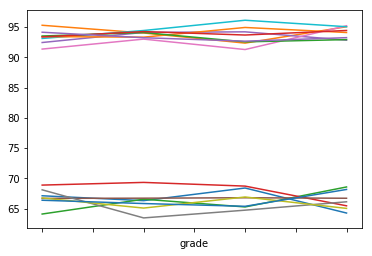

In [90]:
import matplotlib.pyplot as plt
% matplotlib inline
math_passing_school.transpose().plot(legend=False)

#### Reading Pass Rate by Grade, School

In [68]:
reading_passing_school_grade = df.groupby(['school', 'grade'])['reading_pass'].value_counts(normalize=True)
#use unstack command to convert the leveled info into a new df with columns of pass and fail, only keep pass column
reading_passing_school = reading_passing_school_grade.unstack(level=-1)['pass']*100
#use unstack command again on the pass data to get grade levels into columns
reading_passing_school = reading_passing_school.unstack(level=-1)

#reorder columns
reading_passing_school = reading_passing_school[['9th', '10th', '11th', '12th']]
#provide temporary formatting on the test score means for the output
reading_passing_school.applymap('{:.2f}%'.format) 

grade,9th,10th,11th,12th
school,,,,
Bailey High School,82.17%,83.54%,80.58%,81.32%
Cabrera High School,96.78%,97.42%,97.10%,96.86%
Figueroa High School,81.54%,81.26%,78.14%,81.96%
Ford High School,79.59%,79.10%,79.97%,78.29%
Griffin High School,96.09%,97.29%,97.51%,97.95%
Hernandez High School,81.11%,80.68%,81.71%,79.74%
Holden High School,94.49%,96.49%,96.12%,98.80%
Huang High School,81.28%,82.14%,80.58%,81.20%
Johnson High School,81.86%,81.50%,79.63%,81.94%


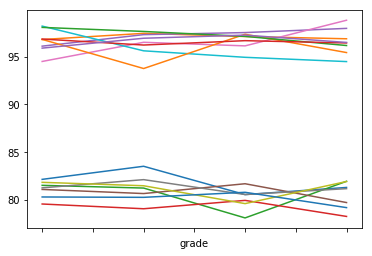

In [91]:
reading_passing_school.transpose().plot(legend=False)